## Predicting pitch being put in Play

In [1]:
# Import libraries needed
import pandas as pd
from sklearn.model_selection import train_test_split
import altair as alt
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

### Exploratory Data Analysis

In [2]:
# Reading the data and displaying the first few rows
pitch_data = pd.read_csv('data/training.csv')
pitch_data.head(3)

,InPlay,Velo,SpinRate,HorzBreak,InducedVertBreak
0,0,95.33,2893.0,10.68,21.33
1,0,94.41,2038.0,17.13,5.77
2,0,90.48,2183.0,6.61,15.39


In [3]:
# Glimpse of column types and null values
pitch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InPlay            10000 non-null  int64  
 1   Velo              10000 non-null  float64
 2   SpinRate          9994 non-null   float64
 3   HorzBreak         10000 non-null  float64
 4   InducedVertBreak  10000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


**There are six records in the dataset where the Spin Rate of the pitch at release (in rpm) contains null values. These rows will be removed from the dataset due to their insignificance, as they account for a mere 0.06% of the total number of rows.**

In [4]:
# Drop null values
pitch_data = pitch_data.dropna(axis=0)
pitch_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InPlay            9994 non-null   int64  
 1   Velo              9994 non-null   float64
 2   SpinRate          9994 non-null   float64
 3   HorzBreak         9994 non-null   float64
 4   InducedVertBreak  9994 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 468.5 KB


**Later on, I will build predictive models using the deployment data. To make sure the models will perform well with unseen data, I will first partition the training set for cross-validation.**

In [5]:
# Data split,
train_df, valid_df = train_test_split(pitch_data, test_size=0.2, random_state=123)

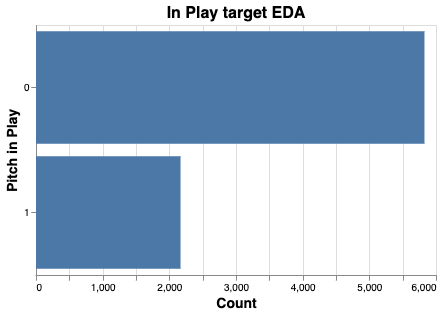

In [7]:
# Plotting InPlay Target Column
inplay_plot = alt.Chart(train_df).mark_bar().encode(
    x=alt.X('count()', title='Count'),
    y=alt.Y('InPlay:N', title='Pitch in Play')
    ).properties(
    title='In Play target EDA',height=250, width=400).configure_axis(
    titleFontSize=14
    ).configure_title(
    fontSize=16
    )
inplay_plot

In [ ]:
# Plotting Feature Columns
velo_dist = alt.Chart(room_type_data).mark_bar().encode(
    alt.X('reviews_per_month', bin=alt.Bin(maxbins=100), scale=alt.Scale(domain=(0, 10)), title = 'Monthly reviews'),
    alt.Y('count()', title = 'Count', stack=False),
    ).properties(
    height=300, 
    width=400, 
    title="New York 2019 Airbnb monthly reviews per accommodation"
    )
count_dist